In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas_ta as ta 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
r = pd.read_csv("RMCI.csv")
df0 = pd.DataFrame(r)
df0.head()

ticker    miladi     open     high      low    close  volume         value  \
0  همراه  20130820  42000.0  42200.0  42000.0  42001.0  546520  2.295462e+10   
1  همراه  20130821  42009.0  43500.0  42005.0  42142.0  161499  6.929039e+09   
2  همراه  20130824  43300.0  43300.0  42222.0  42191.0  110913  4.724576e+09   
3  همراه  20130825  42860.0  42860.0  42453.0  42213.0   67490  2.869908e+09   
4  همراه  20130826  42401.0  42501.0  42036.0  42214.0  160307  6.768045e+09   

   transaction_count  lastday_price    shamsi  
0                 69         1000.0  13920529  
1                214        42001.0  13920530  
2                168        42142.0  13920602  
3                 94        42191.0  13920603  
4                121        42213.0  13920604

In [5]:
df0 = df0.drop(columns=['ticker'])
df0['trend'] = df0.apply(lambda row: 1 if row['close'] > row['lastday_price'] else 0 , axis = 1)
df0.head()

miladi     open     high      low    close  volume         value  \
0  20130820  42000.0  42200.0  42000.0  42001.0  546520  2.295462e+10   
1  20130821  42009.0  43500.0  42005.0  42142.0  161499  6.929039e+09   
2  20130824  43300.0  43300.0  42222.0  42191.0  110913  4.724576e+09   
3  20130825  42860.0  42860.0  42453.0  42213.0   67490  2.869908e+09   
4  20130826  42401.0  42501.0  42036.0  42214.0  160307  6.768045e+09   

   transaction_count  lastday_price    shamsi  trend  
0                 69         1000.0  13920529      1  
1                214        42001.0  13920530      1  
2                168        42142.0  13920602      1  
3                 94        42191.0  13920603      1  
4                121        42213.0  13920604      1

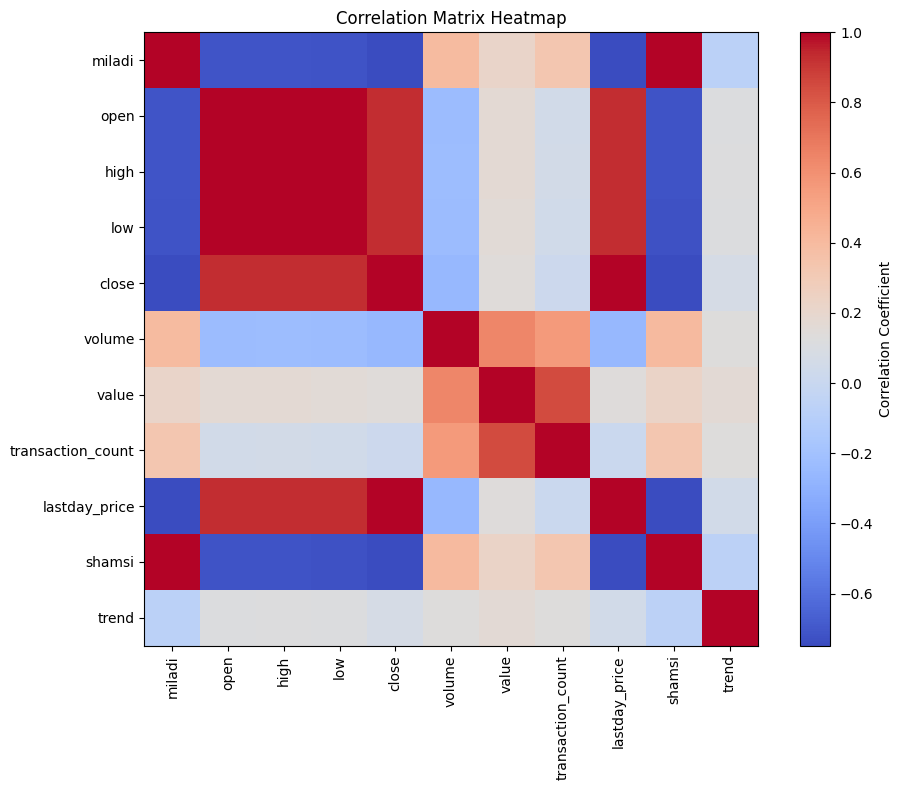

In [6]:
correlation_matrix = df0.corr()

plt.figure(figsize=(10,8))

plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')

plt.colorbar(label="Correlation Coefficient")

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation Matrix Heatmap")

plt.tight_layout()
plt.show()

In [7]:
X0 = df0.drop(columns=['trend'])
y0 = df0['trend']

In [8]:
X0 = sm.add_constant(X0)

In [9]:
model1 = sm.OLS(y0, X0)
results1 = model1.fit()

In [10]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  trend   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     38.87
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           4.47e-72
Time:                        15:17:03   Log-Likelihood:                -1740.8
No. Observations:                2735   AIC:                             3504.
Df Residuals:                    2724   BIC:                             3569.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                70.2120     16.81

### اعمال اندیکاتورها

In [11]:
df0['SMA_20'] = ta.sma(df0['close'], length=20)

df0['EMA_20'] = ta.ema(df0['close'], length=20)

df0['RSI_14'] = ta.rsi(df0['close'], length=14)

df0[['MACD', 'MACD_Hist', 'MACD_Signal']] = ta.macd(df0['close'], fast=12, slow=26, signal=9)

df0[['Stoch_K', 'Stoch_D']] = ta.stoch(df0['high'], df0['low'], df0['close'], k=14, d=3)

In [12]:
# df0['VWAP'] = ta.vwap(df0['high'], df0['low'], df0['close'], df0['volume'])

df0['ATR_14'] = ta.atr(df0['high'], df0['low'], df0['close'], length=14)

In [13]:
print(df0.columns)

Index(['miladi', 'open', 'high', 'low', 'close', 'volume', 'value',
       'transaction_count', 'lastday_price', 'shamsi', 'trend', 'SMA_20',
       'EMA_20', 'RSI_14', 'MACD', 'MACD_Hist', 'MACD_Signal', 'Stoch_K',
       'Stoch_D', 'ATR_14'],
      dtype='object')


In [14]:
bbands = df0.ta.bbands(close='close', length=20)

df0 = pd.concat([df0, bbands], axis=1)

In [15]:
print(df0.columns)

Index(['miladi', 'open', 'high', 'low', 'close', 'volume', 'value',
       'transaction_count', 'lastday_price', 'shamsi', 'trend', 'SMA_20',
       'EMA_20', 'RSI_14', 'MACD', 'MACD_Hist', 'MACD_Signal', 'Stoch_K',
       'Stoch_D', 'ATR_14', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0',
       'BBB_20_2.0', 'BBP_20_2.0'],
      dtype='object')


In [ ]:
df0.head(40)

In [17]:
columns_to_plot = ['close', 'SMA_20', 'EMA_20', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0']

In [18]:
df1_copy = df0.copy()

In [ ]:
df1_copy.head(40)

In [20]:
df1_copy['miladi'] = pd.to_datetime(df1_copy['miladi'], format='%Y%m%d')

In [21]:
print(df1_copy['miladi'])

0      2013-08-20
1      2013-08-21
2      2013-08-24
3      2013-08-25
4      2013-08-26
          ...    
2730   2024-12-10
2731   2024-12-11
2732   2024-12-14
2733   2024-12-15
2734   2024-12-16
Name: miladi, Length: 2735, dtype: datetime64[ns]


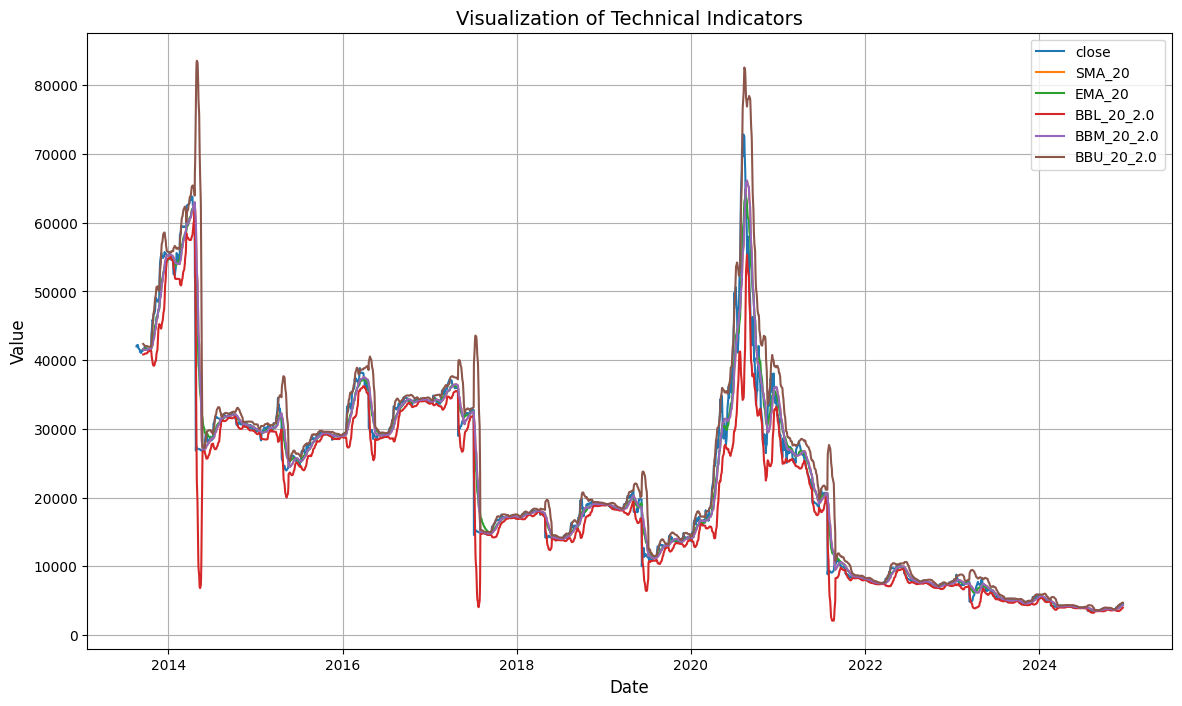

In [22]:
plt.figure(figsize=(14, 8))
for col in columns_to_plot:
    plt.plot(df1_copy['miladi'], df1_copy[col], label=col)

plt.title("Visualization of Technical Indicators", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [23]:
corr = df1_copy.corr()
# print(correlation_matrix)

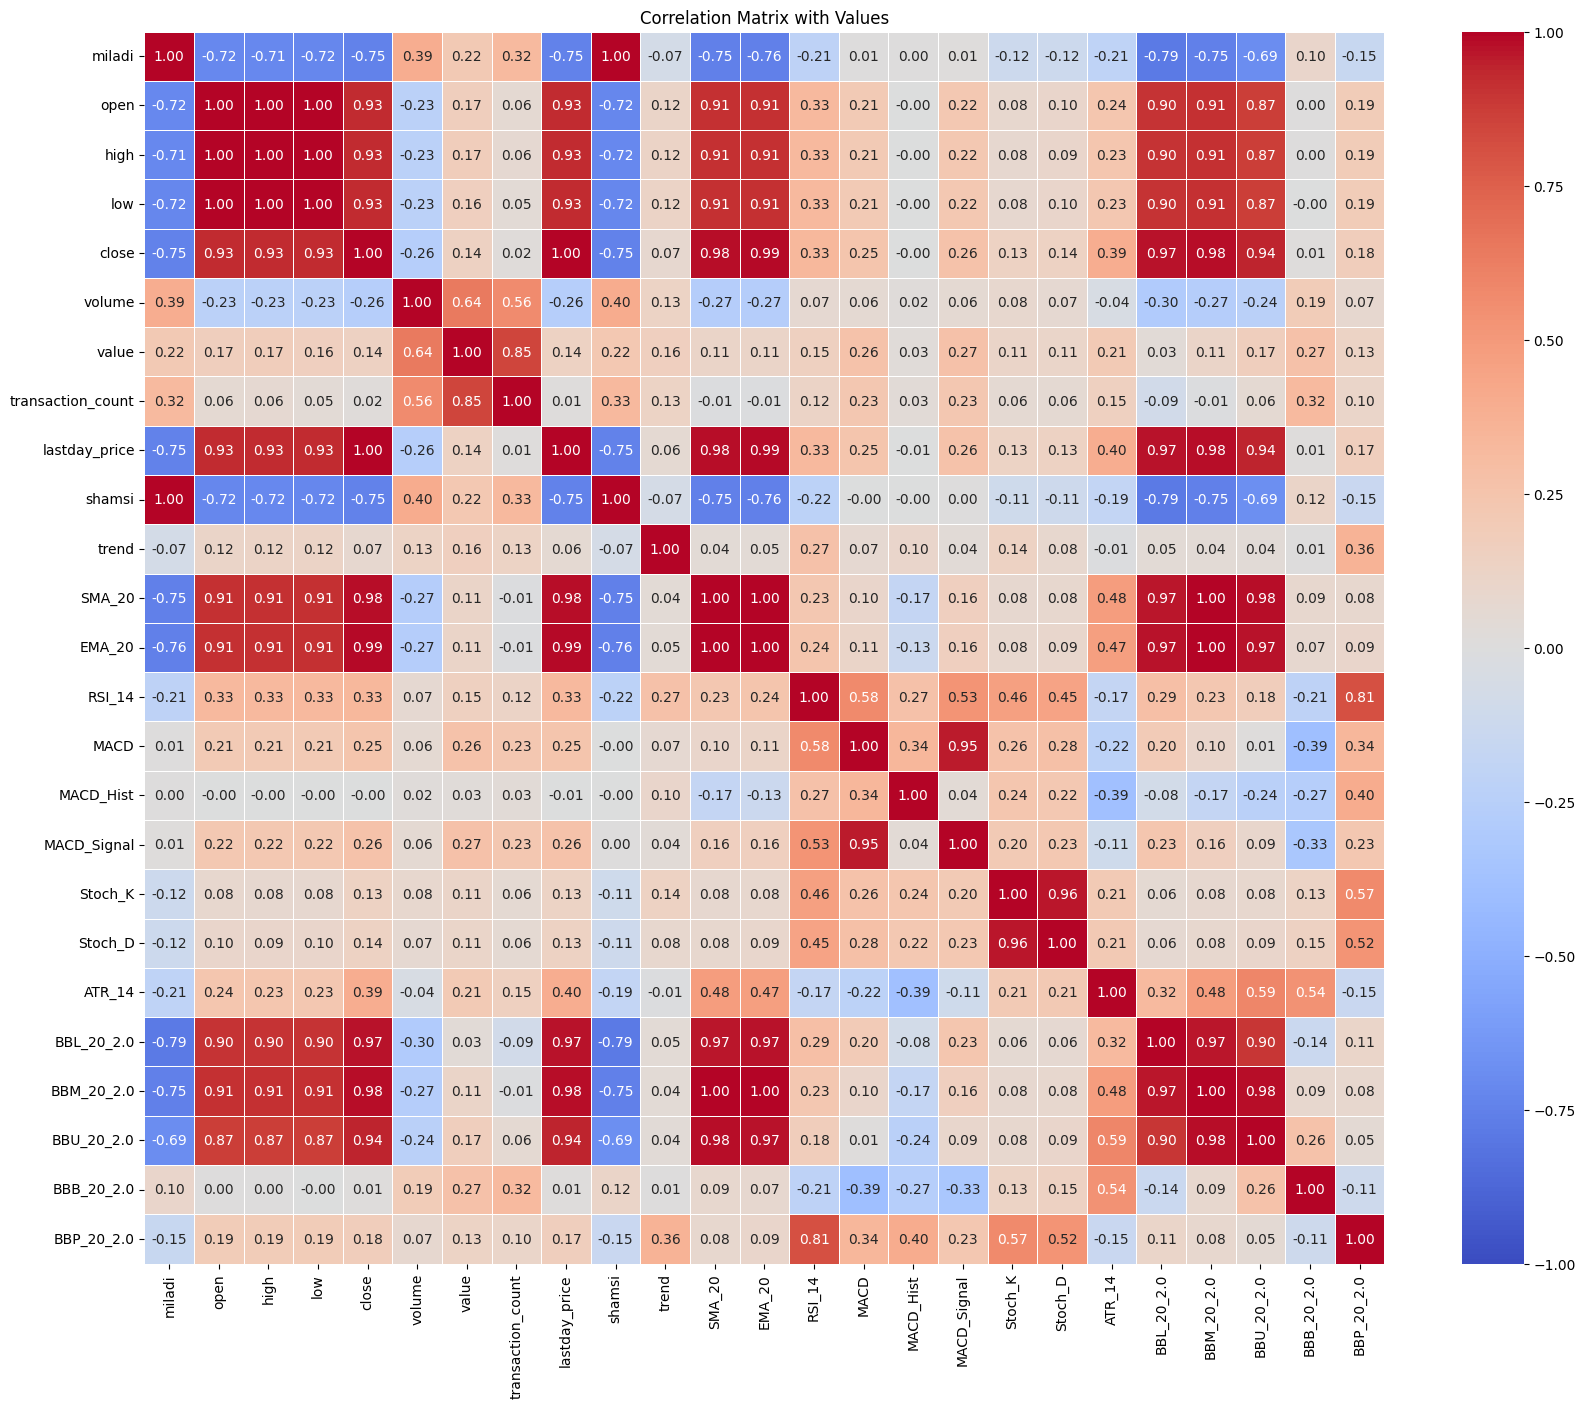

In [24]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar=True)

plt.title('Correlation Matrix with Values')
plt.show()

In [25]:
trend_index = df1_copy.columns.get_loc('trend')
columns_after_trend = df1_copy.columns[trend_index + 1:]

corr_after_trend = corr.loc[columns_after_trend, columns_after_trend]


In [26]:
threshold = 0.8
to_drop = set()

for col1 in corr_after_trend.columns:
    for col2 in corr_after_trend.columns:
        if col1 != col2 and abs(corr_after_trend[col1][col2]) > threshold:
            to_drop.add(col2)  

df1_copy_cleaned = df1_copy.drop(columns=to_drop)
corr_cleaned = df1_copy_cleaned.corr()

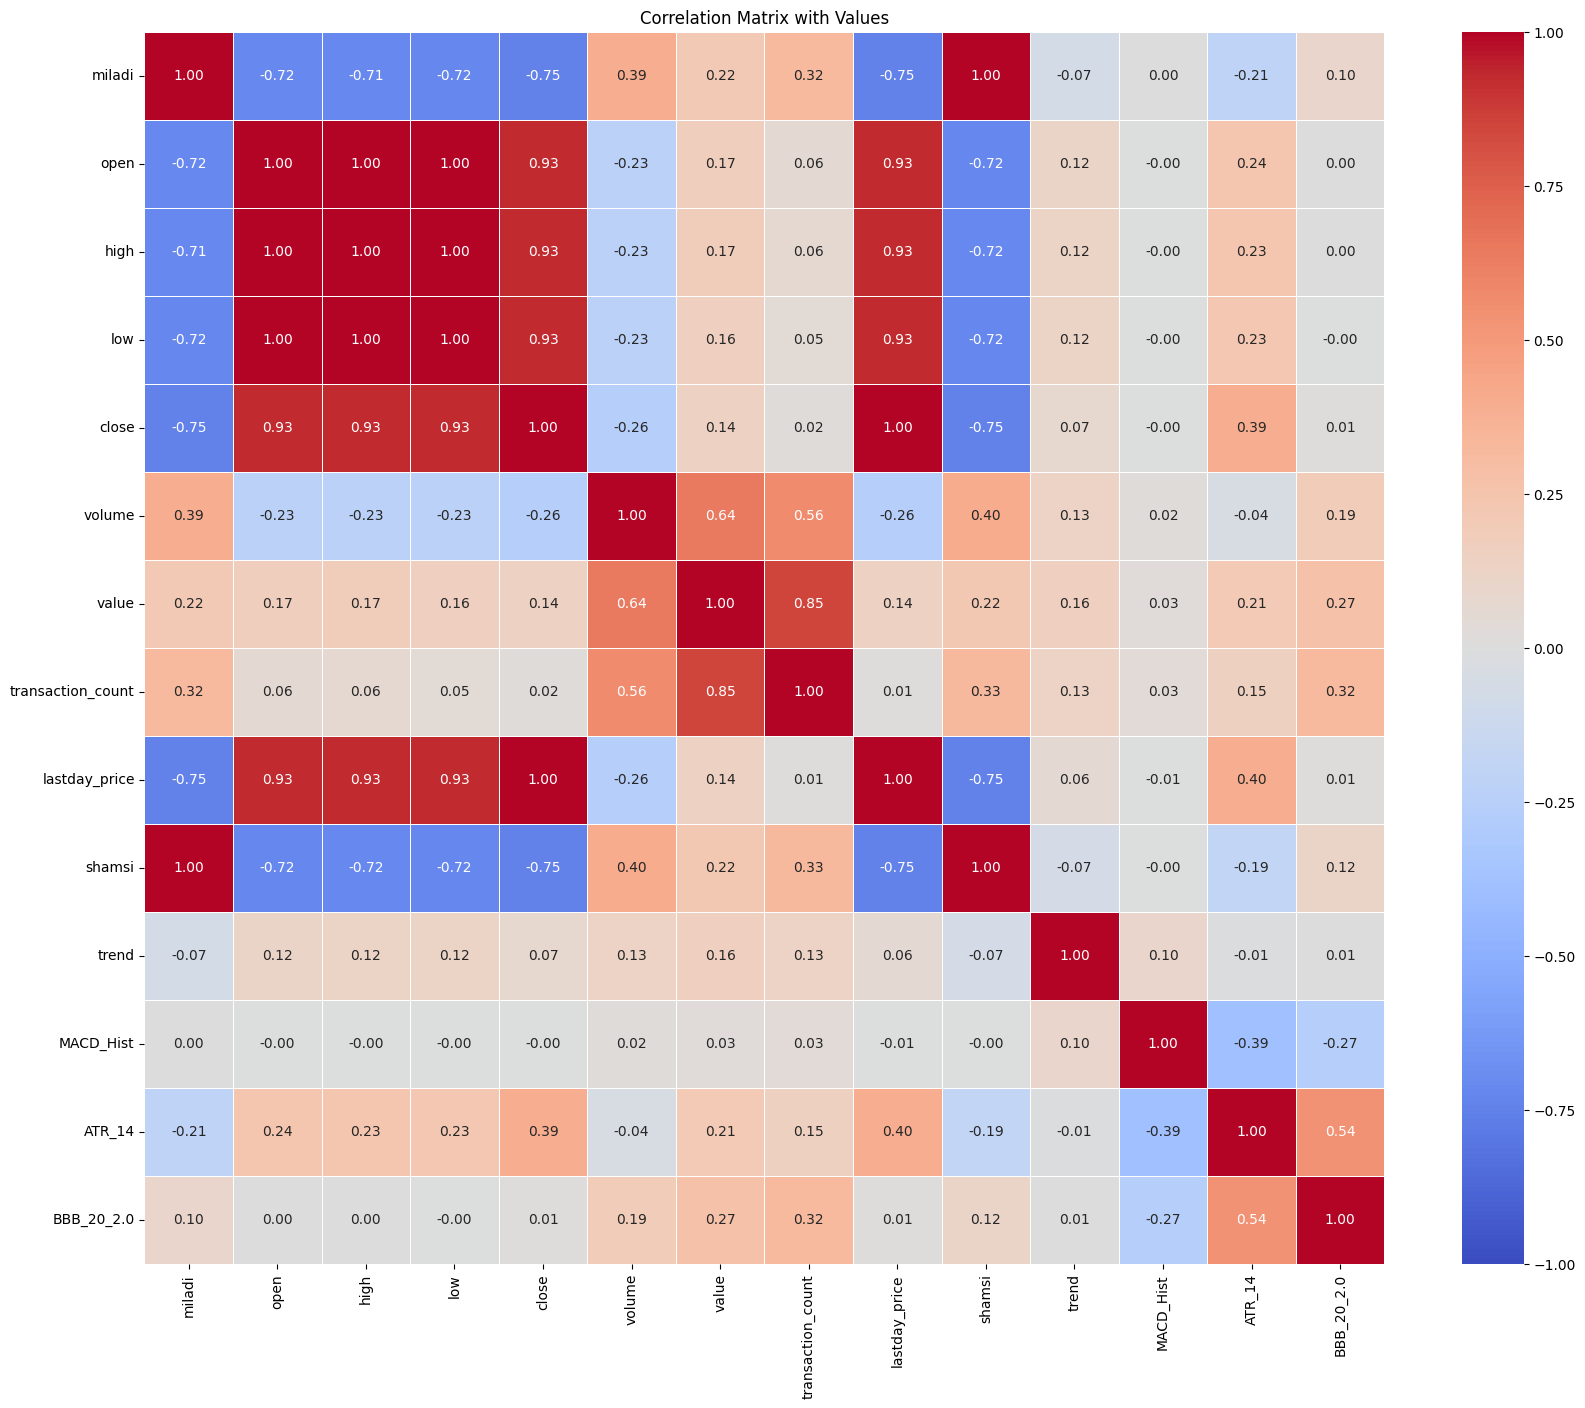

In [27]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_cleaned, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar=True)

plt.title('Correlation Matrix with Values')
plt.show()

In [28]:
print(df1_copy_cleaned.columns)

Index(['miladi', 'open', 'high', 'low', 'close', 'volume', 'value',
       'transaction_count', 'lastday_price', 'shamsi', 'trend', 'MACD_Hist',
       'ATR_14', 'BBB_20_2.0'],
      dtype='object')


In [29]:
keep = ['miladi', 'open', 'high', 'low', 'close', 'volume', 'value','transaction_count', 'lastday_price', 'shamsi', 'trend', 'MACD_Hist','ATR_14', 'BBB_20_2.0']
df0 = df1_copy_cleaned[keep]

In [30]:
df0.head()

miladi     open     high      low    close  volume         value  \
0 2013-08-20  42000.0  42200.0  42000.0  42001.0  546520  2.295462e+10   
1 2013-08-21  42009.0  43500.0  42005.0  42142.0  161499  6.929039e+09   
2 2013-08-24  43300.0  43300.0  42222.0  42191.0  110913  4.724576e+09   
3 2013-08-25  42860.0  42860.0  42453.0  42213.0   67490  2.869908e+09   
4 2013-08-26  42401.0  42501.0  42036.0  42214.0  160307  6.768045e+09   

   transaction_count  lastday_price    shamsi  trend  MACD_Hist  ATR_14  \
0                 69         1000.0  13920529      1        NaN     NaN   
1                214        42001.0  13920530      1        NaN     NaN   
2                168        42142.0  13920602      1        NaN     NaN   
3                 94        42191.0  13920603      1        NaN     NaN   
4                121        42213.0  13920604      1        NaN     NaN   

   BBB_20_2.0  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

### افزودن اندیکاتورهای جدید

In [31]:
adx = ta.adx(df0['high'], df0['low'], df0['close'], length=14)
df0 = df0.join(adx)

df0['WILLR'] = ta.willr(df0['high'], df0['low'], df0['close'], length=14)


In [32]:
df0.head()

miladi     open     high      low    close  volume         value  \
0 2013-08-20  42000.0  42200.0  42000.0  42001.0  546520  2.295462e+10   
1 2013-08-21  42009.0  43500.0  42005.0  42142.0  161499  6.929039e+09   
2 2013-08-24  43300.0  43300.0  42222.0  42191.0  110913  4.724576e+09   
3 2013-08-25  42860.0  42860.0  42453.0  42213.0   67490  2.869908e+09   
4 2013-08-26  42401.0  42501.0  42036.0  42214.0  160307  6.768045e+09   

   transaction_count  lastday_price    shamsi  trend  MACD_Hist  ATR_14  \
0                 69         1000.0  13920529      1        NaN     NaN   
1                214        42001.0  13920530      1        NaN     NaN   
2                168        42142.0  13920602      1        NaN     NaN   
3                 94        42191.0  13920603      1        NaN     NaN   
4                121        42213.0  13920604      1        NaN     NaN   

   BBB_20_2.0  ADX_14  DMP_14  DMN_14  WILLR  
0         NaN     NaN     NaN     NaN    NaN  
1         NaN     NaN     NaN     NaN    NaN  
2         NaN     NaN     NaN     NaN    NaN  
3         NaN     NaN     NaN     NaN    NaN  
4         NaN     NaN     NaN     NaN    NaN

In [33]:
df0['CCI'] = ta.cci(df0['high'], df0['low'], df0['close'], length=20)

df0['OBV'] = ta.obv(df0['close'], df0['volume'])

In [34]:
df0.head()

miladi     open     high      low    close  volume         value  \
0 2013-08-20  42000.0  42200.0  42000.0  42001.0  546520  2.295462e+10   
1 2013-08-21  42009.0  43500.0  42005.0  42142.0  161499  6.929039e+09   
2 2013-08-24  43300.0  43300.0  42222.0  42191.0  110913  4.724576e+09   
3 2013-08-25  42860.0  42860.0  42453.0  42213.0   67490  2.869908e+09   
4 2013-08-26  42401.0  42501.0  42036.0  42214.0  160307  6.768045e+09   

   transaction_count  lastday_price    shamsi  trend  MACD_Hist  ATR_14  \
0                 69         1000.0  13920529      1        NaN     NaN   
1                214        42001.0  13920530      1        NaN     NaN   
2                168        42142.0  13920602      1        NaN     NaN   
3                 94        42191.0  13920603      1        NaN     NaN   
4                121        42213.0  13920604      1        NaN     NaN   

   BBB_20_2.0  ADX_14  DMP_14  DMN_14  WILLR  CCI        OBV  
0         NaN     NaN     NaN     NaN    NaN  NaN   546520.0  
1         NaN     NaN     NaN     NaN    NaN  NaN   708019.0  
2         NaN     NaN     NaN     NaN    NaN  NaN   818932.0  
3         NaN     NaN     NaN     NaN    NaN  NaN   886422.0  
4         NaN     NaN     NaN     NaN    NaN  NaN  1046729.0

In [35]:
df0['MFI'] = ta.mfi(df0['high'], df0['low'], df0['close'], df0['volume'], length=14)

df0['CMO'] = ta.cmo(df0['close'], length=14)

kst = ta.kst(df0['close'], length=10)
df0 = df0.join(kst)

C:\Users\Sazgar\AppData\Local\Temp\ipykernel_17388\3445094111.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6.87162095e+09 4.72167732e+09 2.26462474e+09 ... 5.02400052e+10
 5.46220138e+10 1.81974075e+11]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df0['MFI'] = ta.mfi(df0['high'], df0['low'], df0['close'], df0['volume'], length=14)
C:\Users\Sazgar\AppData\Local\Temp\ipykernel_17388\3445094111.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.86890991e+09 6.77302419e+09 1.26098209e+10 ... 5.92765009e+10
 4.32705824e+10 1.23466814e+11]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df0['MFI'] = ta.mfi(df0['high'], df0['low'], df0['close'], df0['volume'], length=14)


In [36]:
df0.head()

miladi     open     high      low    close  volume         value  \
0 2013-08-20  42000.0  42200.0  42000.0  42001.0  546520  2.295462e+10   
1 2013-08-21  42009.0  43500.0  42005.0  42142.0  161499  6.929039e+09   
2 2013-08-24  43300.0  43300.0  42222.0  42191.0  110913  4.724576e+09   
3 2013-08-25  42860.0  42860.0  42453.0  42213.0   67490  2.869908e+09   
4 2013-08-26  42401.0  42501.0  42036.0  42214.0  160307  6.768045e+09   

   transaction_count  lastday_price    shamsi  ...  ADX_14  DMP_14  DMN_14  \
0                 69         1000.0  13920529  ...     NaN     NaN     NaN   
1                214        42001.0  13920530  ...     NaN     NaN     NaN   
2                168        42142.0  13920602  ...     NaN     NaN     NaN   
3                 94        42191.0  13920603  ...     NaN     NaN     NaN   
4                121        42213.0  13920604  ...     NaN     NaN     NaN   

   WILLR  CCI        OBV  MFI  CMO  KST_10_15_20_30_10_10_10_15  KSTs_9  
0    NaN  NaN   546520.0  NaN  NaN                          NaN     NaN  
1    NaN  NaN   708019.0  NaN  NaN                          NaN     NaN  
2    NaN  NaN   818932.0  NaN  NaN                          NaN     NaN  
3    NaN  NaN   886422.0  NaN  NaN                          NaN     NaN  
4    NaN  NaN  1046729.0  NaN  NaN                          NaN     NaN  

[5 rows x 24 columns]

In [37]:
df2_copy = df0.copy()

In [38]:
corr2 = df2_copy.corr()

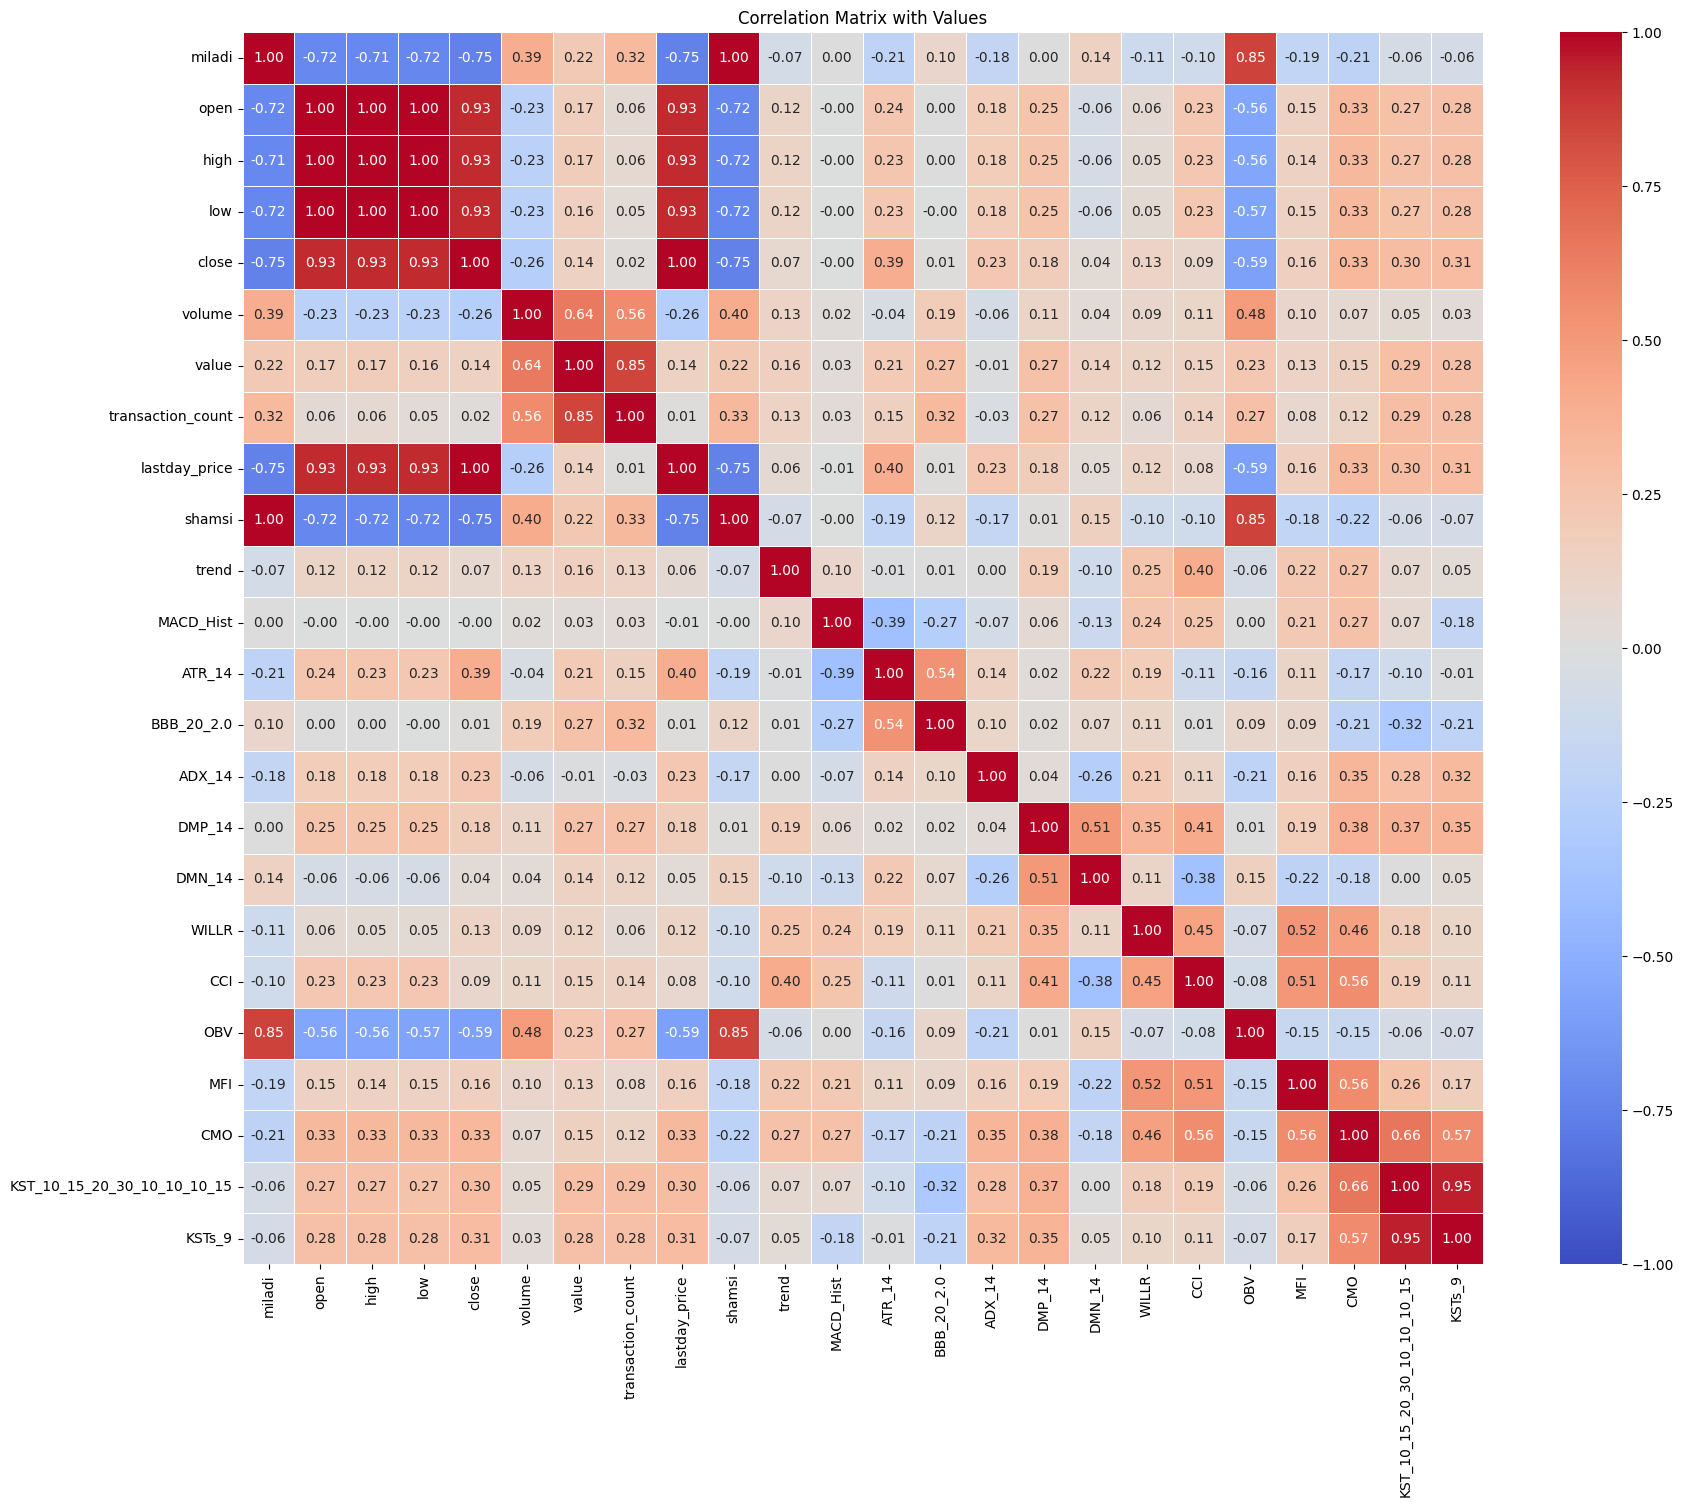

In [39]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr2, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar=True)

plt.title('Correlation Matrix with Values')
plt.show()

In [40]:
trend_index2 = df2_copy.columns.get_loc('trend')
columns_after_trend2 = df2_copy.columns[trend_index2 + 1:]

corr_after_trend2 = corr2.loc[columns_after_trend2, columns_after_trend2]

In [41]:
threshold = 0.8
to_drop = set()

for col1 in corr_after_trend2.columns:
    for col2 in corr_after_trend2.columns:
        if col1 != col2 and abs(corr_after_trend2[col1][col2]) > threshold:
            to_drop.add(col2)  

df2_copy_cleaned = df2_copy.drop(columns=to_drop)
corr_cleaned2 = df2_copy_cleaned.corr()

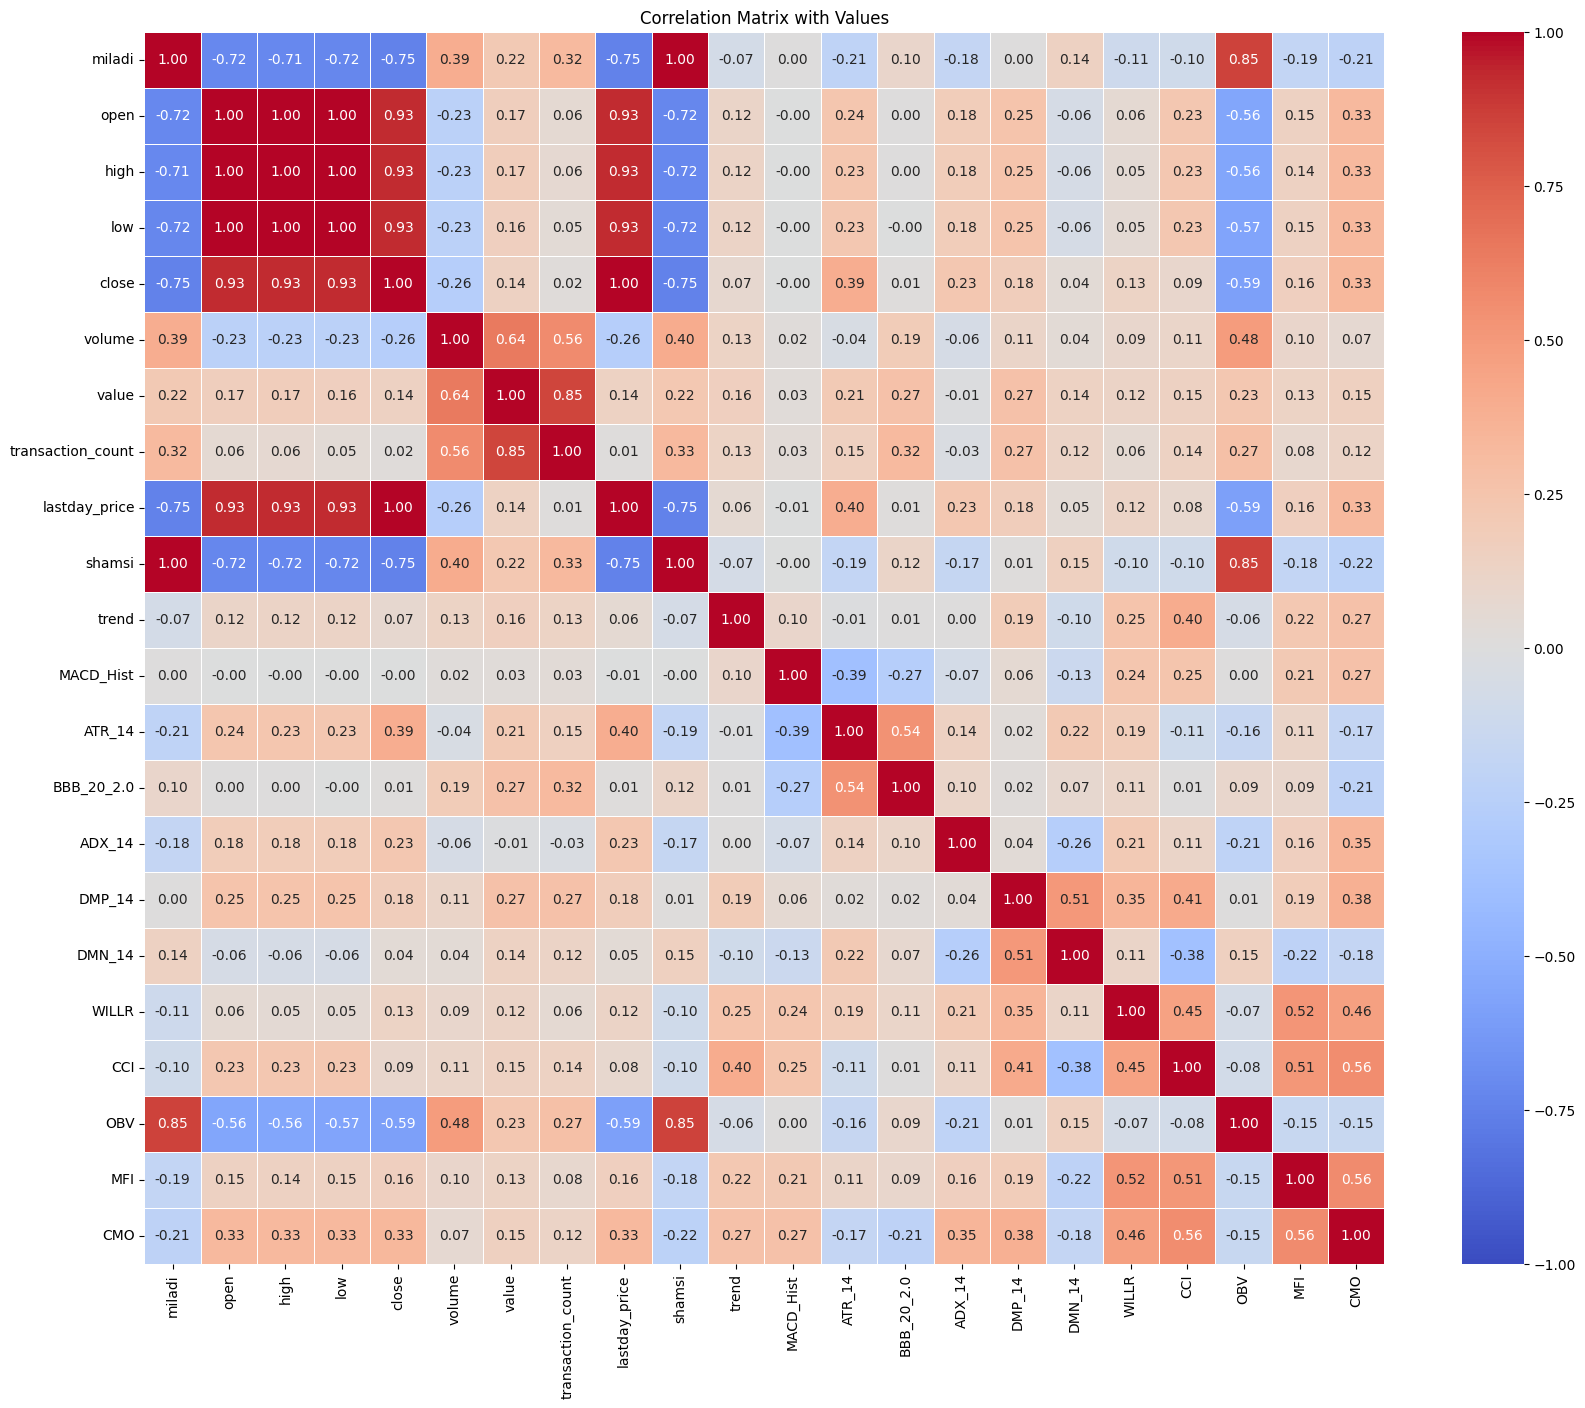

In [42]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_cleaned2, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar=True)

plt.title('Correlation Matrix with Values')
plt.show()

In [43]:
df2_copy_cleaned.head()

miladi     open     high      low    close  volume         value  \
0 2013-08-20  42000.0  42200.0  42000.0  42001.0  546520  2.295462e+10   
1 2013-08-21  42009.0  43500.0  42005.0  42142.0  161499  6.929039e+09   
2 2013-08-24  43300.0  43300.0  42222.0  42191.0  110913  4.724576e+09   
3 2013-08-25  42860.0  42860.0  42453.0  42213.0   67490  2.869908e+09   
4 2013-08-26  42401.0  42501.0  42036.0  42214.0  160307  6.768045e+09   

   transaction_count  lastday_price    shamsi  ...  ATR_14  BBB_20_2.0  \
0                 69         1000.0  13920529  ...     NaN         NaN   
1                214        42001.0  13920530  ...     NaN         NaN   
2                168        42142.0  13920602  ...     NaN         NaN   
3                 94        42191.0  13920603  ...     NaN         NaN   
4                121        42213.0  13920604  ...     NaN         NaN   

   ADX_14  DMP_14  DMN_14  WILLR  CCI        OBV  MFI  CMO  
0     NaN     NaN     NaN    NaN  NaN   546520.0  NaN  NaN  
1     NaN     NaN     NaN    NaN  NaN   708019.0  NaN  NaN  
2     NaN     NaN     NaN    NaN  NaN   818932.0  NaN  NaN  
3     NaN     NaN     NaN    NaN  NaN   886422.0  NaN  NaN  
4     NaN     NaN     NaN    NaN  NaN  1046729.0  NaN  NaN  

[5 rows x 22 columns]

### اعمال مدل ها

In [44]:
trend_index3 = df2_copy_cleaned.columns.get_loc('trend')
df_indicators = df2_copy_cleaned.iloc[:,trend_index3:]
df_indicators = df_indicators.dropna().reset_index(drop=True)
df_indicators.head()

trend  MACD_Hist       ATR_14  BBB_20_2.0     ADX_14     DMP_14     DMN_14  \
0      1 -31.457288  1022.928612    1.770142  16.331547  17.539550  13.069462   
1      0 -30.475761  1111.412581    1.689772  18.061486  23.276394  11.094532   
2      1 -28.272270  1063.286293    1.637669  19.605352  22.451701  10.701448   
3      1 -25.162496  1035.402149    1.579190  21.256413  22.858221  10.146132   
4      1 -18.973825   986.737386    1.511814  22.739773  22.154298   9.833680   

       WILLR        CCI       OBV        MFI        CMO  
0 -59.789030 -43.751068 -447436.0  33.451406  -8.761460  
1 -67.160037  17.194532 -917317.0  39.127579 -12.668029  
2 -67.021277 -36.051598 -651415.0  35.047593 -12.224479  
3 -66.743756 -22.291182 -553518.0  26.014128 -11.280902  
4 -64.569843 -12.809105   97146.0  35.649935  -3.910671

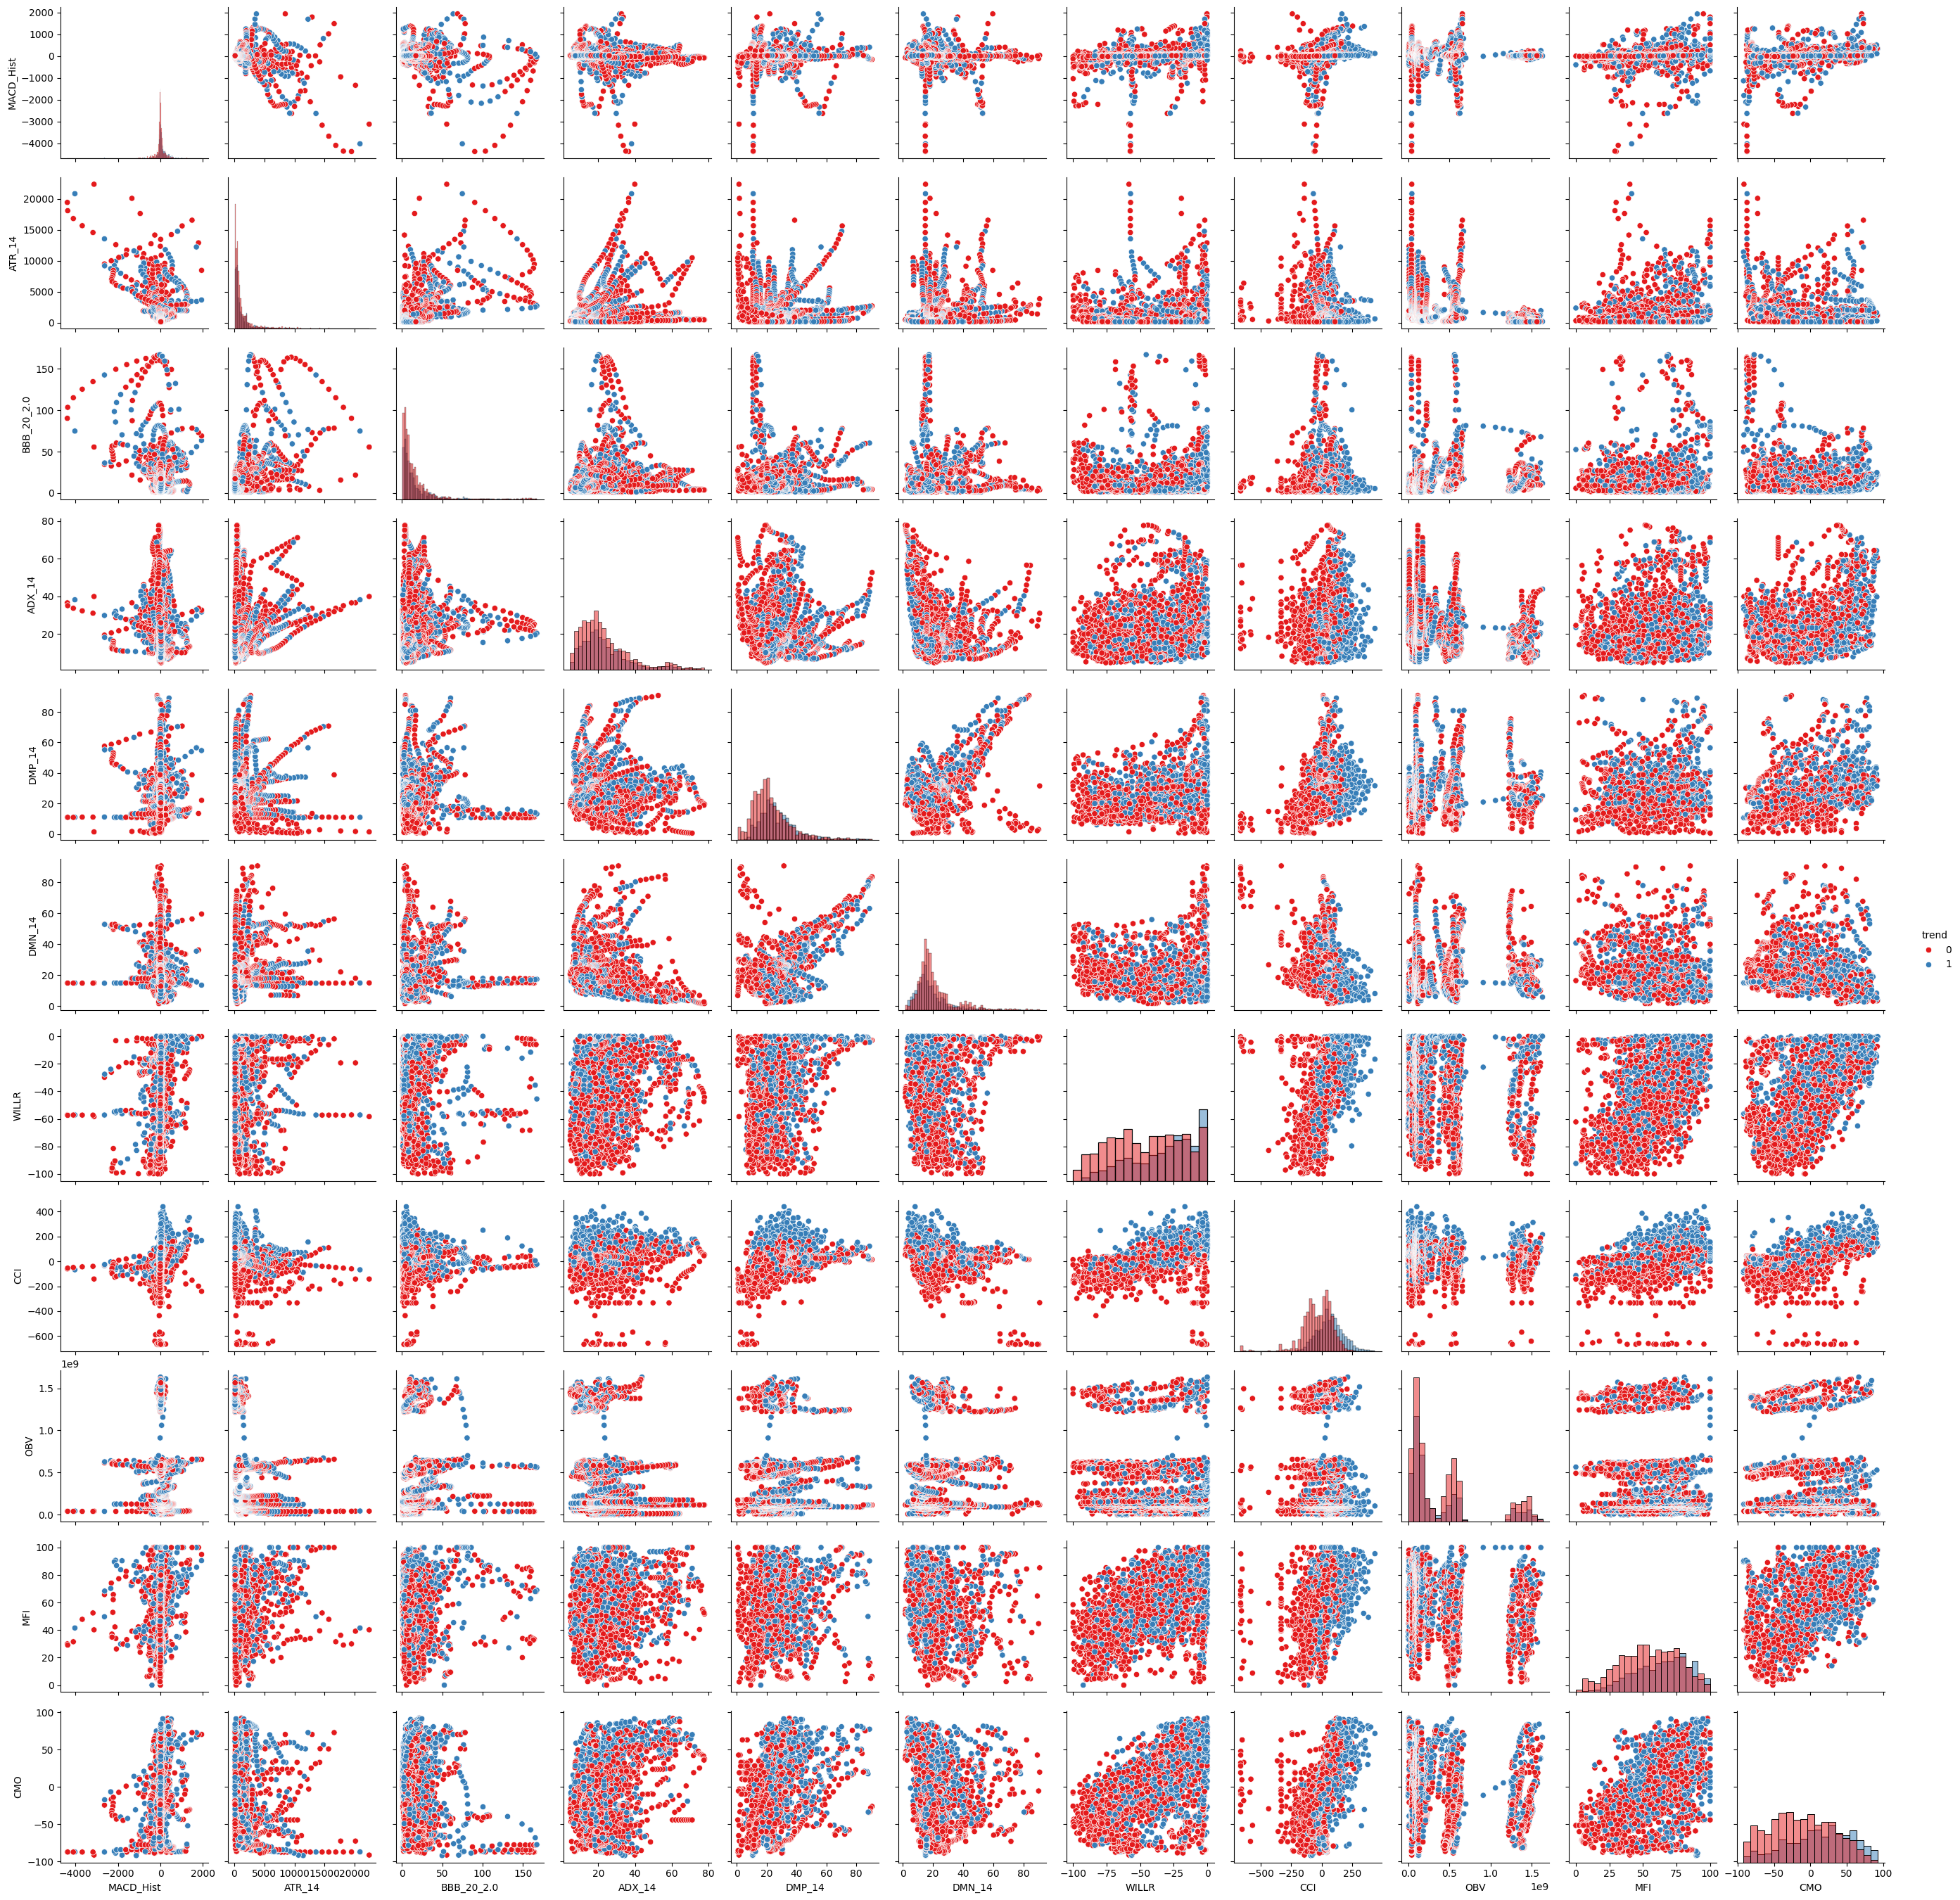

In [49]:
sns.pairplot(df_indicators, hue='trend', diag_kind='hist', palette="Set1")
plt.show()


### تقسیم دیتاها

In [60]:
x = df_indicators.drop(columns=['trend'])
y = df_indicators['trend']

In [61]:
size = int(len(df_indicators)*0.8)

x_train , x_test = x[:size] , x[size:]
y_train , y_test = y[:size] , y[size:]

In [62]:
x = df_indicators.drop(columns=['trend'])
y = df_indicators['trend']

In [76]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Logistic Regression

In [ ]:
modelLR = LogisticRegression(random_state=42)
modelLR.fit(x_train_scaled,y_train)

LogisticRegression(random_state=42)

In [65]:
y1_pred = modelLR.predict(x_test_scaled)

In [67]:
print('Accuracy: ',accuracy_score(y_test, y1_pred))
print('Precision: ',precision_score(y_test, y1_pred, pos_label=1))
print('Recall: ',recall_score(y_test, y1_pred, pos_label=1))
print('F1 Score: ',f1_score(y_test, y1_pred, pos_label=1))

Accuracy:  0.7060998151571165
Precision:  0.6534653465346535
Recall:  0.3473684210526316
F1 Score:  0.4536082474226804


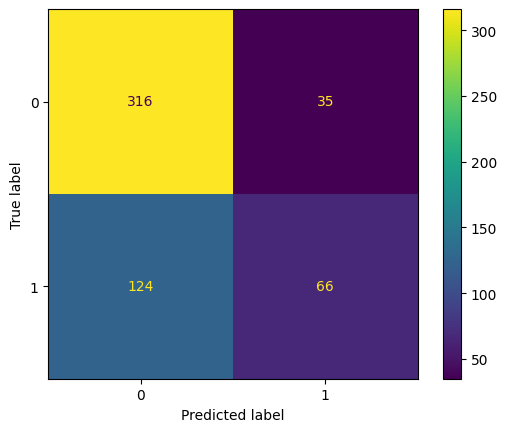

In [69]:
cm = confusion_matrix(y_test, y1_pred)

cm_disply = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= [0,1])
cm_disply.plot()
plt.show()

### KNN

In [79]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=2)

In [80]:
y2_pred = knn.predict(x_test_scaled)


In [81]:
print('Accuracy: ',accuracy_score(y_test, y2_pred))
print('Precision: ',precision_score(y_test, y2_pred, pos_label=1))
print('Recall: ',recall_score(y_test, y2_pred, pos_label=1))
print('F1 Score: ',f1_score(y_test, y2_pred, pos_label=1))

Accuracy:  0.66728280961183
Precision:  0.5446428571428571
Recall:  0.32105263157894737
F1 Score:  0.40397350993377484


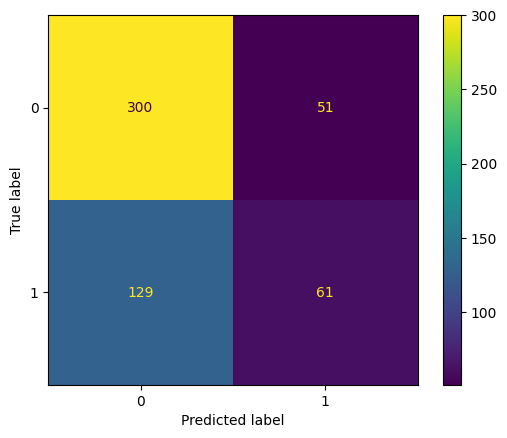

In [82]:
cm = confusion_matrix(y_test, y2_pred)

cm_disply = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= [0,1])
cm_disply.plot()
plt.show()

### SVM (non linear)

In [84]:
svm_m = SVC(kernel='rbf' , C=1.0 , gamma='scale')
svm_m.fit(x_train_scaled, y_train)

SVC()

In [86]:
y3_pred = svm_m.predict(x_test_scaled)

In [91]:
print('Accuracy: ',accuracy_score(y_test, y3_pred))
print('Precision: ',precision_score(y_test, y3_pred, pos_label=1))
print('Recall: ',recall_score(y_test, y3_pred, pos_label=1))
print('F1 Score: ',f1_score(y_test, y3_pred, pos_label=1))

Accuracy:  0.6876155268022182
Precision:  0.6779661016949152
Recall:  0.21052631578947367
F1 Score:  0.321285140562249


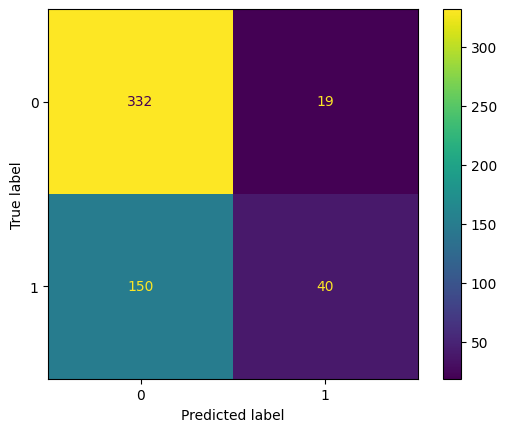

In [ ]:
cm = confusion_matrix(y_test, y3_pred)

cm_disply = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= [0,1])
cm_disply.plot()
plt.show()

### SVM (linear)

In [93]:
svm_m = SVC(kernel='linear' , C=1.0 , gamma='scale')
svm_m.fit(x_train_scaled, y_train)

SVC(kernel='linear')

In [94]:
y4_pred = svm_m.predict(x_test_scaled)

In [ ]:
print('Accuracy: ',accuracy_score(y_test, y4_pred))
print('Precision: ',precision_score(y_test, y4_pred))
print('Recall: ',recall_score(y_test, y4_pred, pos_label=1))
print('F1 Score: ',f1_score(y_test, y4_pred, pos_label=1))

Accuracy:  0.6765249537892791
Precision:  0.5384615384615384
Recall:  0.5526315789473685
F1 Score:  0.5454545454545454


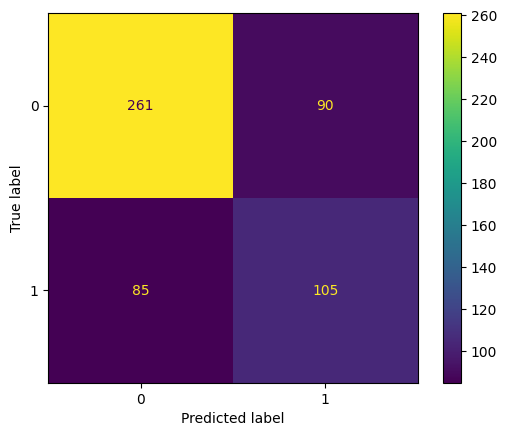

In [96]:
cm = confusion_matrix(y_test, y3_pred)

cm_disply = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= [0,1])
cm_disply.plot()
plt.show()

In [105]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 'scale'],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 'scale'],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [106]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


In [110]:
best_model = grid.best_estimator_
y5_pred = best_model.predict(x_test_scaled)

In [111]:
print('Accuracy: ',accuracy_score(y_test, y5_pred))
print('Precision: ',precision_score(y_test, y5_pred))
print('Recall: ',recall_score(y_test, y5_pred, pos_label=1))
print('F1 Score: ',f1_score(y_test, y5_pred, pos_label=1))

Accuracy:  0.7097966728280961
Precision:  0.6736842105263158
Recall:  0.3368421052631579
F1 Score:  0.44912280701754387


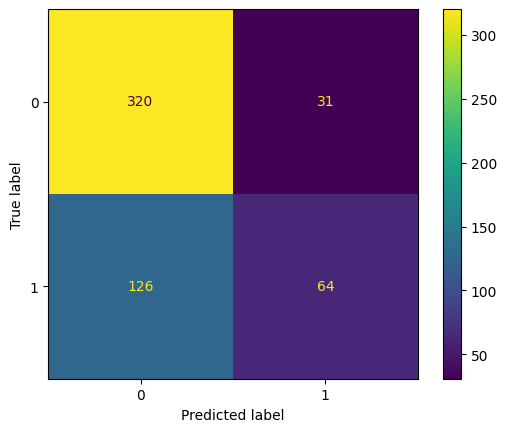

In [133]:
cm = confusion_matrix(y_test, y5_pred)

cm_disply = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= [0,1])
cm_disply.plot()
plt.show()

### Gradient Boosting

In [123]:
gb_m = GradientBoostingClassifier(
    n_estimators=100,  
    learning_rate=0.1, 
    max_depth=3,  
    random_state=42
)
gb_m.fit(x_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [124]:
y6_pred = gb_m.predict(x_test_scaled)

In [125]:
print('Accuracy: ',accuracy_score(y_test, y6_pred))
print('Precision: ',precision_score(y_test, y6_pred))
print('Recall: ',recall_score(y_test, y6_pred, pos_label=1))
print('F1 Score: ',f1_score(y_test, y6_pred, pos_label=1))

Accuracy:  0.7097966728280961
Precision:  0.6513761467889908
Recall:  0.3736842105263158
F1 Score:  0.47491638795986624


In [126]:
param_grid2 = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [127]:
grid2 = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid2, cv=5, verbose=2)
grid2.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             verbose=2)

In [128]:
print("Best Parameters:", grid2.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [129]:
best_model2 = grid2.best_estimator_
y7_pred = best_model2.predict(x_test_scaled)

In [130]:

print('Accuracy: ',accuracy_score(y_test, y7_pred))
print('Precision: ',precision_score(y_test, y7_pred))
print('Recall: ',recall_score(y_test, y7_pred, pos_label=1))
print('F1 Score: ',f1_score(y_test, y7_pred, pos_label=1))

Accuracy:  0.7079482439926063
Precision:  0.6428571428571429
Recall:  0.37894736842105264
F1 Score:  0.4768211920529801


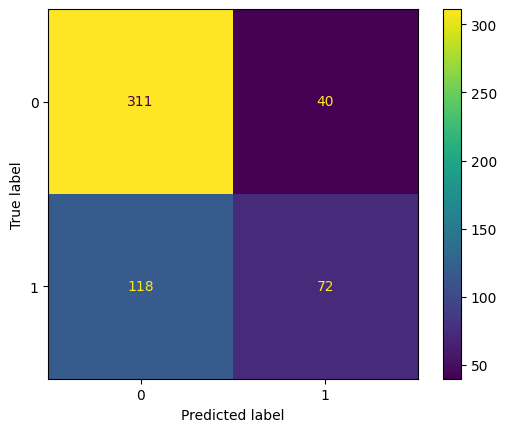

In [132]:
cm = confusion_matrix(y_test, y7_pred)

cm_disply = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= [0,1])
cm_disply.plot()
plt.show()